In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
mta = pd.read_csv('stations_final.csv', parse_dates=['date', 'timestamp'], low_memory=False)

In [3]:
mta.head()

,station,turnstile,ca,unit,scp,linename,num_lines,division,desc,date,time,timestamp,weekday,entries,exits,total
0,14 ST,14 ST-N078-R175-01-00-00,N078,R175,01-00-00,ACEL,4,IND,REGULAR,2019-08-03,05:00:00,2019-08-03 05:00:00,Saturday,99.0,48.0,147.0
1,14 ST,14 ST-N078-R175-01-00-00,N078,R175,01-00-00,ACEL,4,IND,REGULAR,2019-08-03,09:00:00,2019-08-03 09:00:00,Saturday,55.0,180.0,235.0
2,14 ST,14 ST-N078-R175-01-00-00,N078,R175,01-00-00,ACEL,4,IND,REGULAR,2019-08-03,13:00:00,2019-08-03 13:00:00,Saturday,221.0,564.0,785.0
3,14 ST,14 ST-N078-R175-01-00-00,N078,R175,01-00-00,ACEL,4,IND,REGULAR,2019-08-03,17:00:00,2019-08-03 17:00:00,Saturday,428.0,693.0,1121.0
4,14 ST,14 ST-N078-R175-01-00-00,N078,R175,01-00-00,ACEL,4,IND,REGULAR,2019-08-03,21:00:00,2019-08-03 21:00:00,Saturday,440.0,546.0,986.0


In [4]:
mta.station.unique()

array(['14 ST', '14 ST-UNION SQ', '23 ST', '34 ST-HERALD SQ',
       '34 ST-PENN STA', '42 ST-BRYANT PK', '47-50 STS ROCK',
       'CHAMBERS ST', 'LEXINGTON AV/53', 'W 4 ST-WASH SQ'], dtype=object)

In [16]:
group_station_day = mta.groupby(['station','weekday'])['total'].sum()
group_station_day.head(15).reset_index()

,station,weekday,total
0,14 ST,Friday,648077.0
1,14 ST,Monday,550154.0
2,14 ST,Saturday,399640.0
3,14 ST,Sunday,336777.0
4,14 ST,Thursday,665561.0
5,14 ST,Tuesday,647814.0
6,14 ST,Wednesday,654931.0
7,14 ST-UNION SQ,Friday,1122918.0
8,14 ST-UNION SQ,Monday,962588.0
9,14 ST-UNION SQ,Saturday,748187.0


Text(0.5, 335.24999999999994, '')

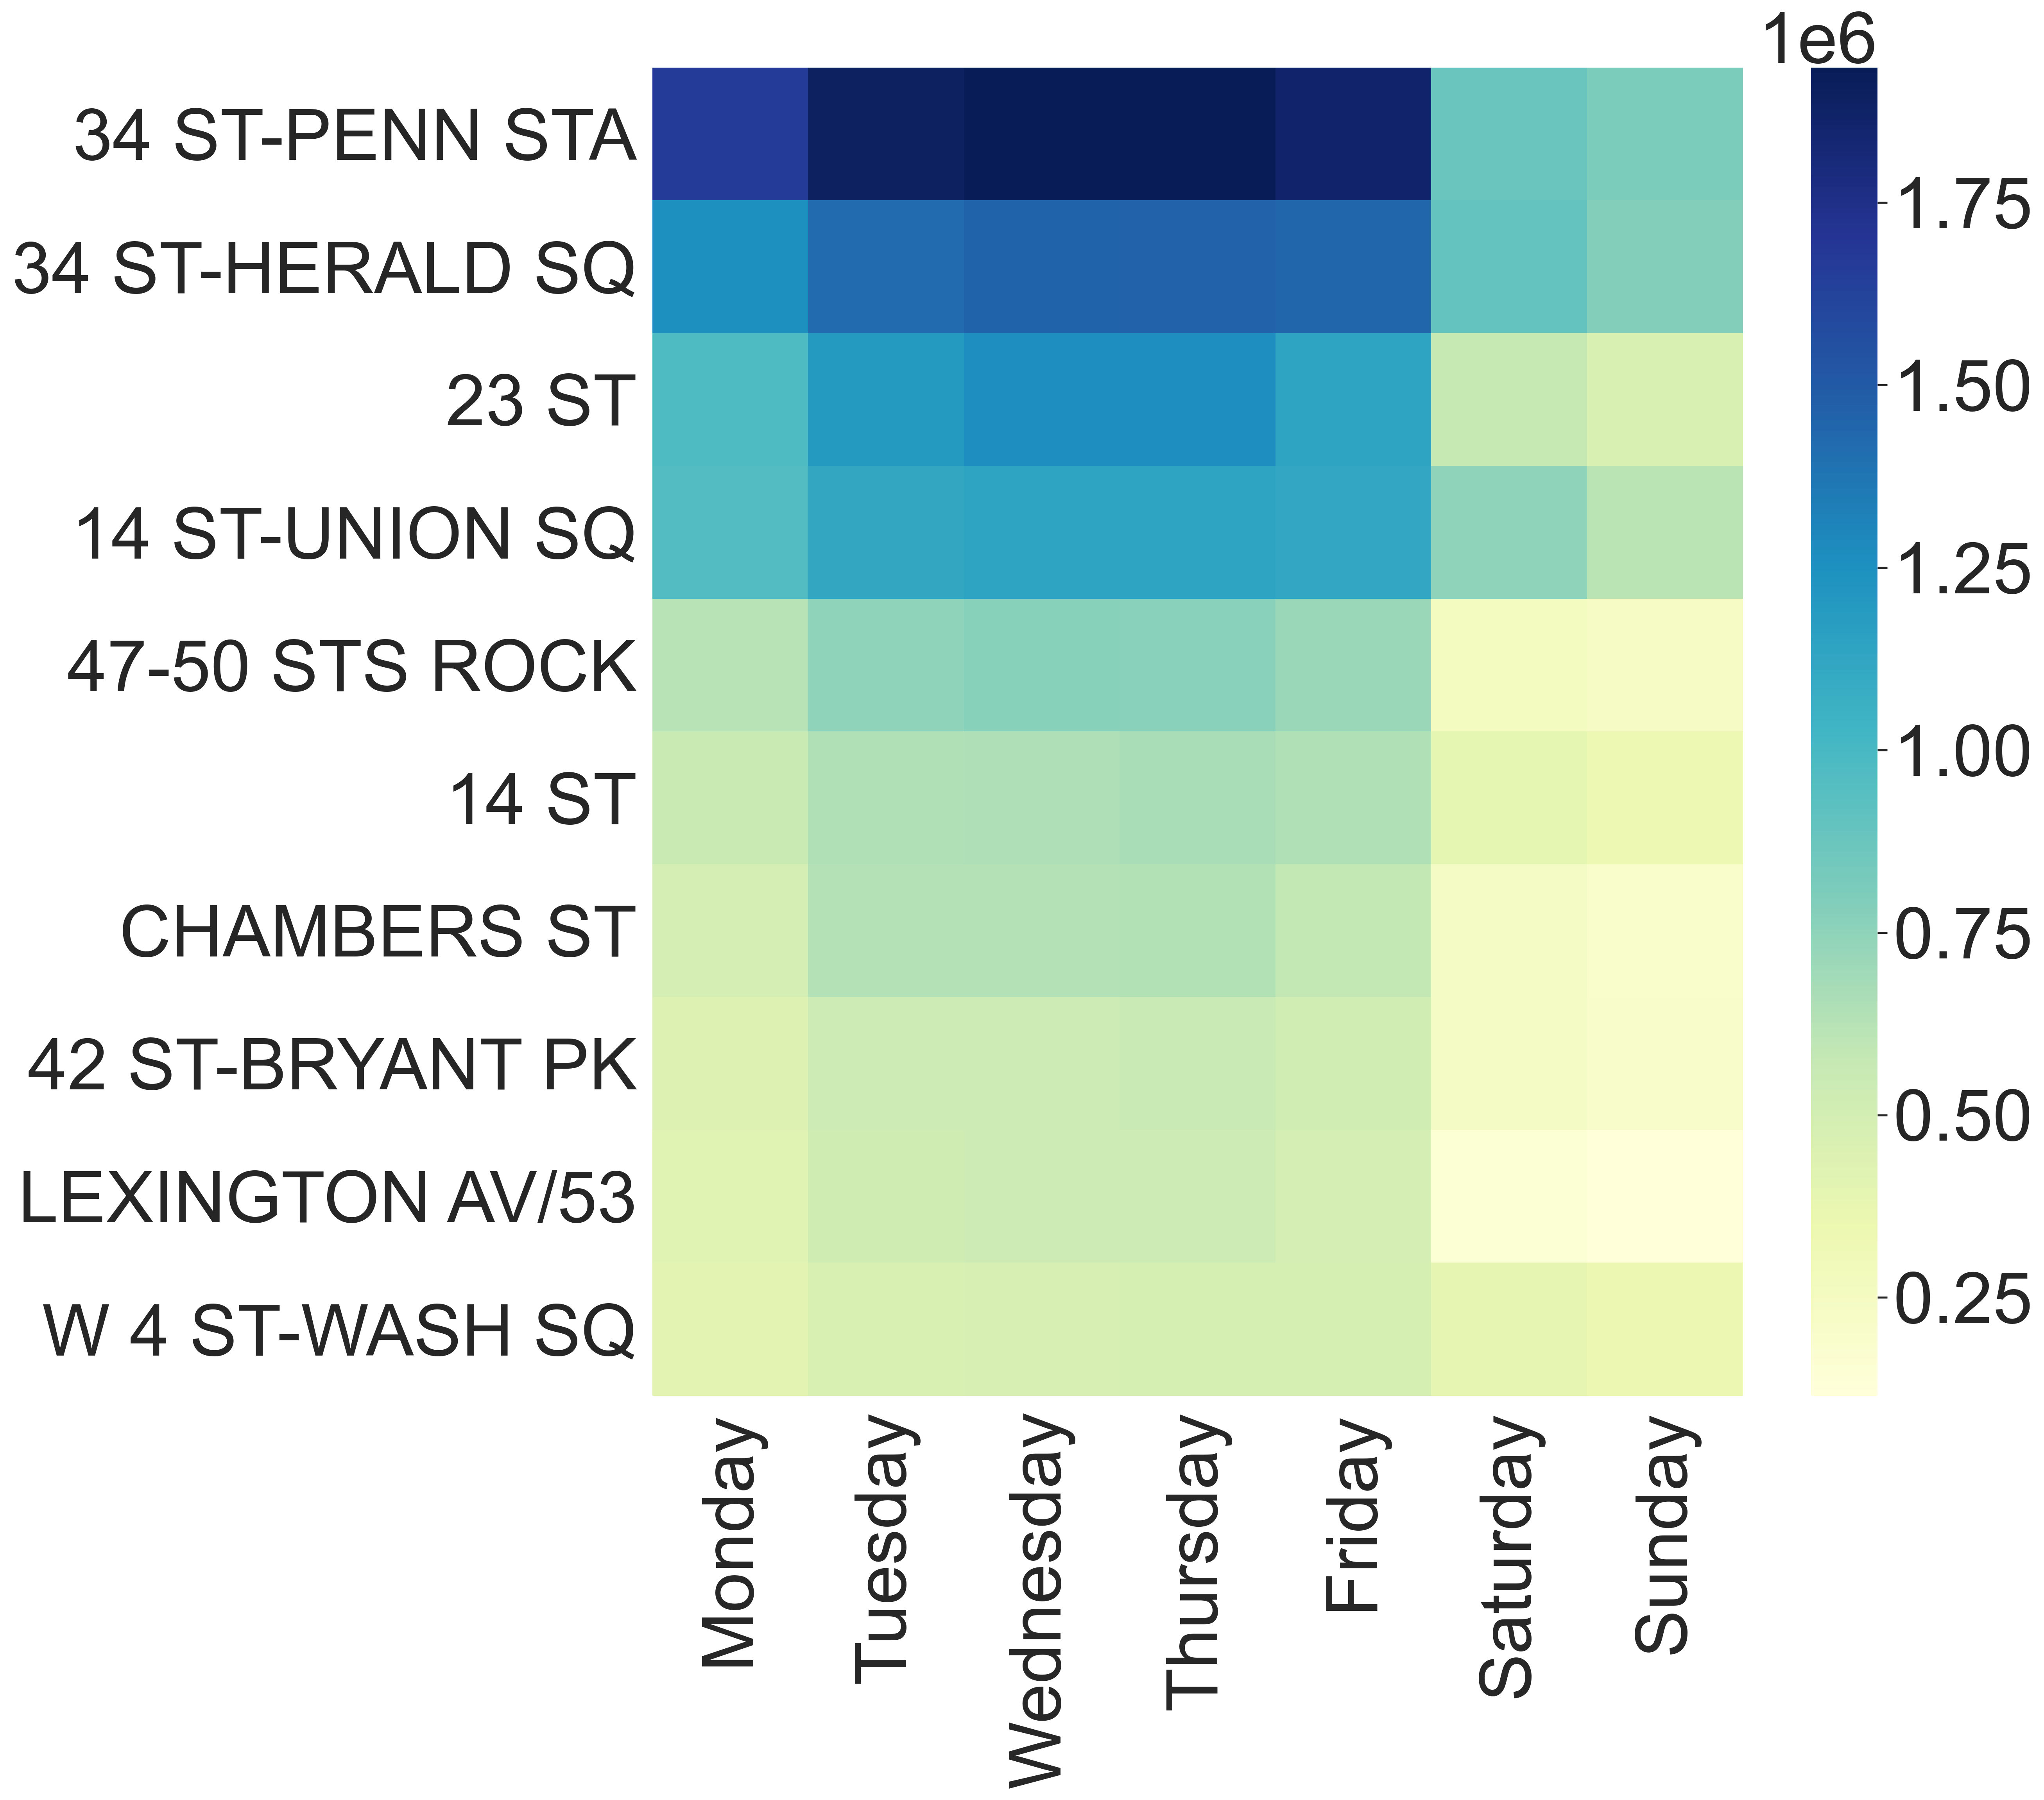

In [48]:
sns.set(font_scale = 4)

matrix_station_day = group_station_day.unstack()
matrix_station_day.reset_index()
matrix_station_day = matrix_station_day.reindex(columns=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
matrix_station_day = matrix_station_day.reindex(index=['14 ST', '14 ST-UNION SQ', '23 ST', '34 ST-HERALD SQ',
       '34 ST-PENN STA', '42 ST-BRYANT PK', '47-50 STS ROCK',
       'CHAMBERS ST', 'LEXINGTON AV/53', 'W 4 ST-WASH SQ'])
matrix_station_day.sort_values(by='Monday',ascending=False,inplace=True)

fig, ax = plt.subplots(1, 1, figsize = (15, 15), dpi=300)

sns.heatmap(matrix_station_day,cmap='YlGnBu');

ax.set_ylabel('')    
ax.set_xlabel('')

In [35]:
#array = np.array(matrix_station_day.applymap(lambda x:str(round(x/1000,1))+'k'))
#fig2 = plt.figure(figsize=[10,10])
#cmap = sns.cubehelix_palette(light=1, as_cmap=True)
#ax2 = sns.heatmap(matrix_station_day,cmap='Blues',linecolor='white',linewidths=1,annot = array,fmt='')
#plt.xlabel('Day of the Week',fontsize=15)
#plt.ylabel('Top 10 Stations',fontsize=15)   
#plt.title('Station Traffic in the Week',weight='bold',fontsize=15)